# Demonstrating model instabiltiy and creating stable models

In [2]:
#Import required libraries

import pandas as pd  # for data handling
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for visualization
import seaborn as sns  # for nicer plots
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print("Feature Shape:", X.shape)
print("Target counts:\n", y.value_counts())

X.head()

Feature Shape: (569, 30)
Target counts:
 target
1    357
0    212
Name: count, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#copy the original data
X_instable = X.copy()

# add random noise to the first 5 features
noise = np.random.normal(0, 10, size=X_instable.iloc[:, :5].shape)
X_instable.iloc[:, :5] += noise

#scale one important feature excessively (e.g., 'mean radius')
X_instable['mean radius'] = X_instable['mean radius'] * 100

#drop a known important feature (e.g., 'mean perimeter')
X_instable.drop(columns=['mean perimeter'], inplace=True)

# Confirm shape
print("Modified shape:", X_instable.shape)

Modified shape: (569, 29)


## Observe instability

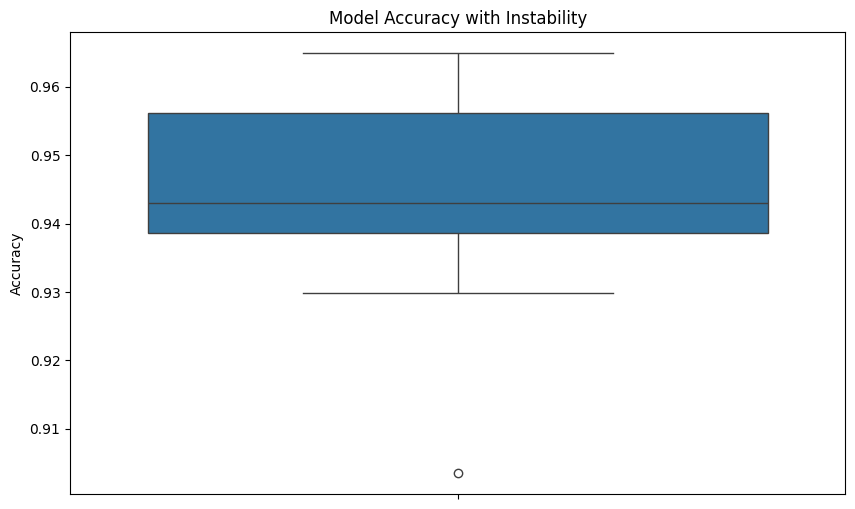

Mean Accuracy: 0.9438596491228071
Std Deviation: 0.017631360738808565


In [7]:
scores = []

# Define a function to evaluate the model
for seed in range(10):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_instable, y, test_size=0.2, random_state=seed)
    
    # Initialize the model
    model = LogisticRegression(max_iter=1000)
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

plt.figure(figsize=(10, 6))
sns.boxplot(scores)
plt.title('Model Accuracy with Instability')
plt.ylabel('Accuracy') 
plt.show()

print("Mean Accuracy:", np.mean(scores))
print("Std Deviation:", np.std(scores))

## Stabilize Model

### Restore clean dataset

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold

X_copy = X.copy()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_copy)

### Cross Validation with the Logistic Regression

In [13]:
model = LogisticRegression(max_iter=1000)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

cv_scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='accuracy')

# Display results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

Cross-Validation Accuracy Scores: [0.98245614 0.98245614 0.94736842 0.96491228 0.98245614 0.94736842
 1.         0.98245614 0.98245614 1.        ]
Mean Accuracy: 0.9771929824561403
Standard Deviation: 0.01763136073880859


- Here a low standard deviation means the model performs consistently across folds → indicates stable performance.